In [1]:
import numpy as np
import glob
import os
import shutil
import matplotlib.pyplot as plt
import pretty_midi
from pypianoroll import Multitrack, Track
from utils import *
import matplotlib2tikz

ROOT_PATH = 'D:\Anaconda\Jupyter Notebook\pretty_midi\dataset\classic'

In [87]:
"""calculate velocity's distribution per npy"""
l = [f for f in os.listdir(ROOT_PATH)]
# velocity = np.zeros(128)
data = np.load(os.path.join(ROOT_PATH, l[0]))
v_temp = set(data[np.nonzero(data)])
velocitys = np.array([v for v in v_temp])
for i in range(1, len(l)):
    data = np.load(os.path.join(ROOT_PATH, l[i]))
    v_temp = set(data[np.nonzero(data)])
    v_temp = np.array([v for v in v_temp])
    velocitys = np.hstack((velocitys, v_temp))
# print(velocity)
print(velocitys.shape)

(309255,)


In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, aspect='auto')
plt.hist(velocitys, bins=range(1,128))
x_tick = [i for i in range(1,126,5)]
x_tick.append(127)
plt.xticks(x_tick)
plt.grid(True)
plt.xlabel('velocity', fontsize=20)
plt.ylabel('# of npys',fontsize=20)
plt.title('velocity distribution: Pop', fontsize=20)

plt.savefig('velocity distribution_Pop.jpg')
plt.show()

In [17]:
"""calculate # of velocity per npy"""
l = [f for f in os.listdir(ROOT_PATH)]
print(len(l))
# velocity = np.zeros(128)
data = np.load(os.path.join(ROOT_PATH, l[0]))
v_temp = set(data[np.nonzero(data)])
velocitys = [len(v_temp)]
for i in range(1, len(l)):
    data = np.load(os.path.join(ROOT_PATH, l[i]))
    v_temp = set(data[np.nonzero(data)])
    velocitys = np.hstack((velocitys, len(v_temp)))
# print(velocitys)
print(velocitys.shape)

14908
(14908,)


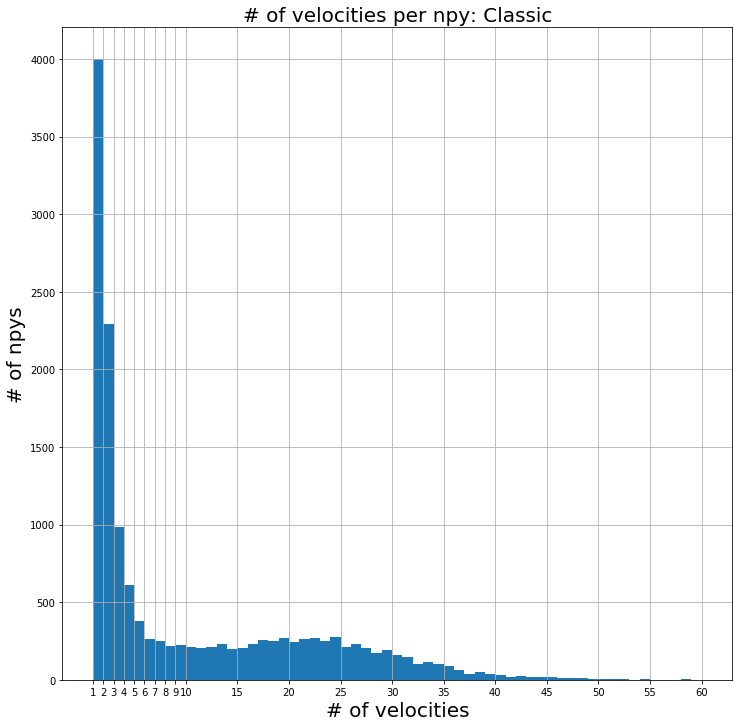

In [18]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, aspect='auto')
plt.hist(velocitys, bins=range(1,np.max(velocitys)))
x_tick = [i for i in range(10,61,5)]
for idx in range(1, 10):
    x_tick.append(idx)
plt.xticks(x_tick)
plt.grid(True)
plt.xlabel('# of velocities', fontsize=20)
plt.ylabel('# of npys',fontsize=20)
plt.title('# of velocities per npy: Classic', fontsize=20)

plt.savefig('velocities_per_npy_Classic.jpg')
plt.show()

In [16]:
"""calculate # of velocity per song"""
ROOT_PATH = 'D:\Anaconda\Jupyter Notebook\pretty_midi\dataset'
data_type = 'pop'
data_path = 'MIDI\{}\cleaner_npy_train'.format(data_type)
l = [f for f in os.listdir(os.path.join(ROOT_PATH, data_path))]
print(len(l))
data = np.load(os.path.join(ROOT_PATH, data_path, l[0]))
v_temp = set(data[np.nonzero(data)])
velocitys = [len(v_temp)]
for i in range(1, len(l)):
    data = np.load(os.path.join(ROOT_PATH, data_path, l[i]))
    v_temp = set(data[np.nonzero(data)])
    velocitys = np.hstack((velocitys, len(v_temp)))
print(velocitys.shape)
print(np.max(velocitys))

784
(784,)
122


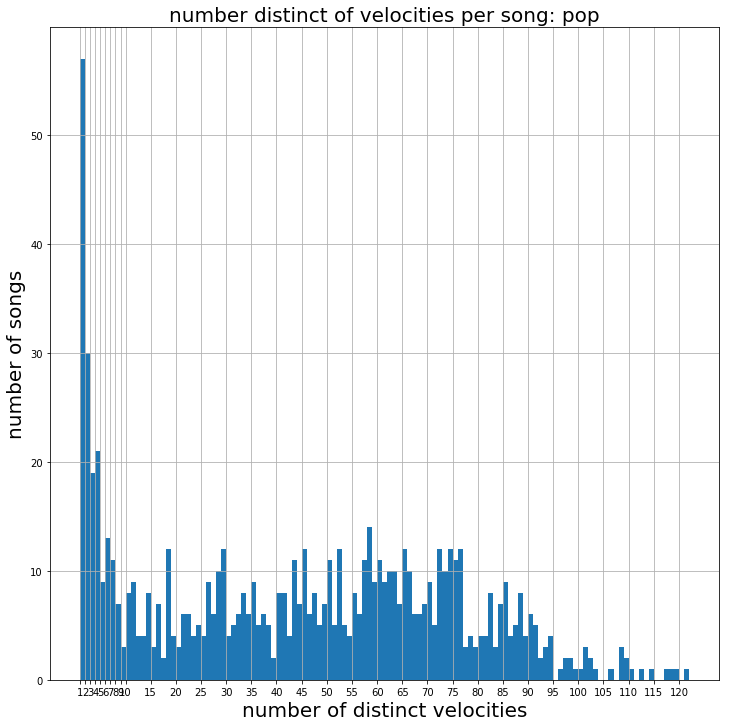

In [17]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, aspect='auto')
plt.hist(velocitys, bins=range(1,np.max(velocitys)+1))
x_tick = [i for i in range(10,121,5)]
for idx in range(1, 10):
    x_tick.append(idx)
plt.xticks(x_tick)
plt.grid(True)
plt.xlabel('number of distinct velocities', fontsize=20)
plt.ylabel('number of songs',fontsize=20)
plt.title('number distinct of velocities per song: {}'.format(data_type), fontsize=20)

matplotlib2tikz.save("velocities_per_song_{}.tex".format(data_type))
# plt.savefig('velocities_per_song_{}.jpg'.format(data_type))
plt.show()

In [85]:
"""calculate velocity range per song"""
ROOT_PATH = 'D:\Anaconda\Jupyter Notebook\pretty_midi\dataset'
data_type = 'Classic'
data_path = 'MIDI\{}\{}_train\cleaner_npy'.format(data_type, data_type)
l = [f for f in os.listdir(os.path.join(ROOT_PATH, data_path))]
print(len(l))
data = np.load(os.path.join(ROOT_PATH, data_path, l[0]))
v_temp = data[np.nonzero(data)]
velocitys_max = [np.max(v_temp)]
velocitys_min = [np.min(v_temp)]
for i in range(1, len(l)):
    data = np.load(os.path.join(ROOT_PATH, data_path, l[i]))
    v_temp = data[np.nonzero(data)]
    velocitys_max = np.hstack((velocitys_max, np.max(v_temp)))
    velocitys_min = np.hstack((velocitys_min, np.min(v_temp)))

738


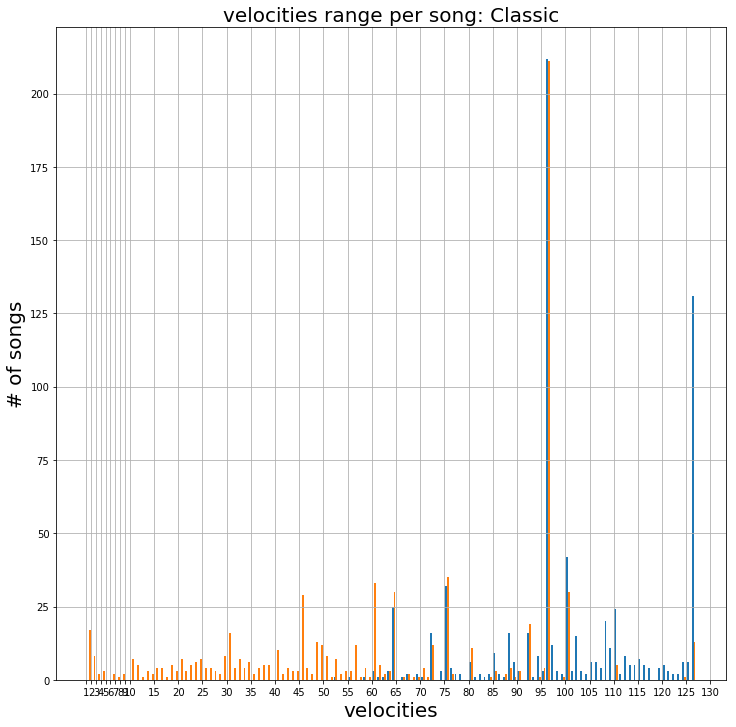

In [86]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, aspect='auto')
plt.hist((velocitys_max, velocitys_min), bins=range(1,128))
x_tick = [i for i in range(10,131,5)]
for idx in range(1, 10):
    x_tick.append(idx)
plt.xticks(x_tick)
plt.grid(True)
plt.xlabel('velocities', fontsize=20)
plt.ylabel('# of songs',fontsize=20)
plt.title('velocities range per song: {}'.format(data_type), fontsize=20)

plt.savefig('velocities_range_per_song_{}.jpg'.format(data_type))
plt.show()

True_False
